# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно определить рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 



Ход исследования: 
1. Изучить обшую информацию 
2. Предобработка данных
3. Добавление новых столбцов
4. Исследовательский анализ данных

## Изучить общую информацию

In [1]:
# импортируем библиотеки 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# читаем файл
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


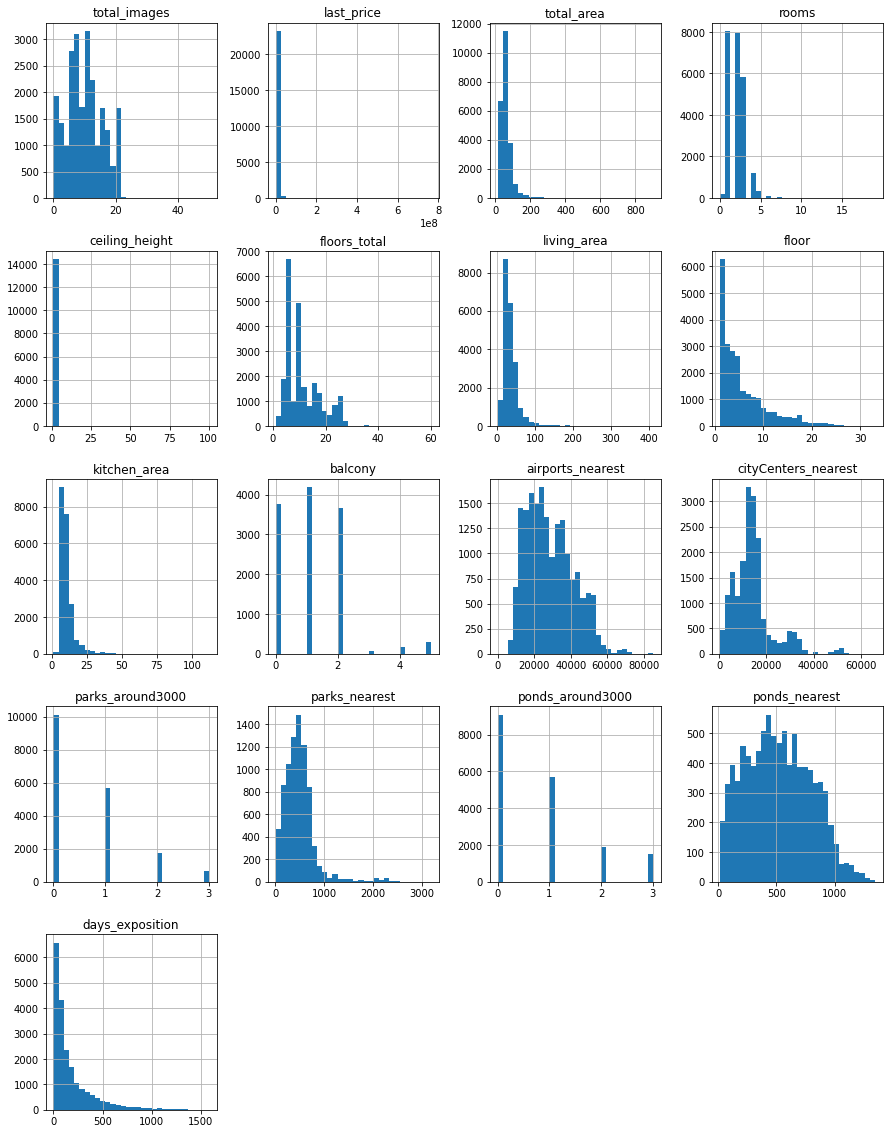

In [5]:
# строим гистограмму для каждого столбца датафрейма
df.hist(bins=30, figsize=(15, 20));

**Вывод** 

Нам предоставлены данные с объявлений о продажах квартир. Данных предостаточно для анализа и есть из чего выбрать.  
Предварительно можно сказать, что в таблице есть пропуски, возможно дубликаты и скорее всего потребуется изменение формата в колонках для удобства.  
Также есть нарушения в стилистике в наименованиях столбцов.

## Предобработка данных

1. Найти и изучить пропущенные значения в столбцах:
    * Определить, в каких столбцах есть пропуски.
    * Заполнить пропущенные значения там, где это возможно. Например, если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски можно заменить на число 0. 
2. Рассмотреть типы данных в каждом столбце:
    * Найти столбцы, в которых нужно изменить тип данных.
    * Преобразовать тип данных в выбранных столбцах.
3. Изучить уникальные значения в столбце с названиями и устраните неявные дубликаты. 

In [6]:
# приведем наименования столбцов к одинаковому стилю
df = df.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 
                        'parks_around3000': 'parks_around_3000', 
                        'ponds_around3000': 'ponds_around_3000'
                       })
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Начнем обработку данных со столбца **total_images**:

In [7]:
df['total_images'].describe()

count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

Есть объявления без фотографий.  

Столбец **last_price**

In [8]:
# отбросим три нуля
df['last_price'] = df['last_price'] / 1000 

# переименуем столбец, чтобы не забыть, что цены в тысячах
df = df.rename(columns={'last_price' : 'price_1000'}) 
df.head()

,total_images,price_1000,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Посмотрим что со столбцом **total_area**

In [9]:
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Рынок квартир не перестает удивлять. Есть как квартиры 12 м^2, так и 900 м^2.

Преобразуем значения столбца **'first_day_exposition'** в дату из строки.

In [10]:
# преобразуем значения столбца 'first_day_exposition' в формат даты
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df.head()

,total_images,price_1000,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Столбец **rooms**

In [11]:
# посмотрим на уникальные значения в столбце 'roоms'
df['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

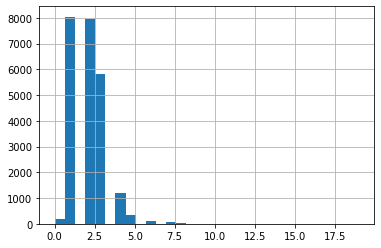

In [12]:
# посмотрим на графике 
df['rooms'].hist(bins=30);

В основоном продаются 1, 2 и 3 комнатные квартиры. 

**ceiling_height**
Заполним пропуски в столбце, где некоторые объекты в таблице не имеют информации о высоте потолка. Вероятно, это ошибка со стороны пользователей (они не считают это важным или просто забыли заполнить это поле), а не ошибка при сборе данных.

In [13]:
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [14]:
# посмотрим на уникальные значения в столбце с потолками
df['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [15]:
# посчитаем кол-во аномально низких и высоких квартир
df[df['ceiling_height'] > 6]['ceiling_height'].count() + df[df['ceiling_height'] < 2.3]['ceiling_height'].count()

45

Столько квартир с анамальными значениями потолков. Т.е. ниже 2.3 и выше 6 метров. 
Попробуем обнулить эти значения. 

In [16]:
df.loc[(df['ceiling_height'] < 2.5) | (df['ceiling_height'] > 5), 'ceiling_height'] = None  
df['ceiling_height'].describe()

count    14395.000000
mean         2.727257
std          0.270974
min          2.500000
25%          2.520000
50%          2.650000
75%          2.800000
max          5.000000
Name: ceiling_height, dtype: float64

Теперь проверим пропсуки в стобце с потолками и посмотрим на графике какие квартиры есть на рынке. 

Информация о высоте потолка отсутствует у 9304 квартир.


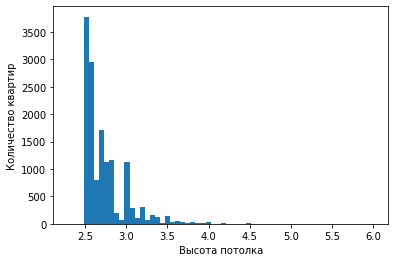

In [17]:
print(f'Информация о высоте потолка отсутствует у {df.ceiling_height.isna().sum()} квартир.')

plt.hist(df[df['ceiling_height'].notna()].ceiling_height, bins=60, range=(2.3, 6))
plt.xlabel('Высота потолка')
plt.ylabel('Количество квартир')
plt.show()

Из графика видно, что большинство квартир имеют высоту потолка от 2.5 до 3.5 метров. Исходя из этого, я считаю, что пропуски следует заполнить медианной высотой потолка.

In [18]:
# заполянем пропуски медианной 
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median()) 

Столбец **floors_total**

In [19]:
df['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [20]:
# посмотрим на уникальные значения в столбце 
df['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

In [21]:
# проверим на пропуски
df.floors_total.isna().sum()

86

В столбце есть пропуски, заполним ее и поменяем данные этого столбца с float на int. 

In [22]:
df['floors_total'] = df['floors_total'].fillna(0)
df['floors_total'] = df['floors_total'].astype(int, errors='ignore')

Столбец **floor**

In [23]:
# проверка пропусков 
df.floor.isna().sum()

0

In [24]:
df['floor'].describe()

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Столбец **floor** чист.

Разберем столбцы **is_apartment** и **balcony**. 

Методом info() мы видели что данне сохранены как object а нам надо bool в столбце **is_apartment** и с float на int в колонке **balcony**.

In [25]:
df.is_apartment.isna().sum()

20924

In [26]:
df.balcony.isna().sum()

11519

Столько пропусков. Возможно в этих квартирах нет балкона, по этому и пропустили это поле при заполнении. 

In [27]:
#заполним пропуски
df['is_apartment'] = df['is_apartment'].fillna('')
df['balcony'] = df['balcony'].fillna(0)

In [28]:
#поменяем на bool
df['is_apartment'] = df['is_apartment'].astype('bool')

In [29]:
#поменяем на int
df['balcony'] = df['balcony'].astype(int)

Столбец **locality_name**

In [30]:
df.locality_name.isna().sum()

49

In [31]:
#незначительное количесвто где не указан город или наседеный пункт, можем удалтять
df.dropna(subset=['locality_name'], inplace=True)

In [32]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Удалим неявные дубликаты, чтобы в таблице не было повторений раздных поселков, сел и т.д. в нескольких вариантах.

In [33]:
df['locality_name'] = (df['locality_name']
    .str.replace('ё', 'е')
    .replace(['городского типа ', 'городской ', 'садовое некоммерческое товарищество ',\
              'садовое товарищество ', 'коттеджный '], '', regex=True)
)

In [34]:
# еще раз проверим что исталось после фильтрации 
df['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Федоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский', 'Новая Ропша',
       'Павловск', 'деревня Пикколово', 'Всеволожск', 'Волхов',
       'Кингисепп', 'Приозерск', 'Сестрорецк', 'деревня Куттузи',
       'поселок Аннино', 'поселок Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Зеленогорск', 'Сосновый Бор', 'дер

**Вывод**

Выполнили преодбработку данных. 

Теперь:
- исправлена стилистика столбцов;
- цены на кваритиры в тысячах рублей, чтоб легче читалось;
- столбец с датой размещения объявления исправили, теперь она читабельно и без времени;
- в столбце с потолками нет квартир ниже 2.3 и выше 6 метров;
- общее кол-во этажей в доме выражено в целых числах; 
- нет пропусков с столбцах 'is_apartment' и балконы, так же перезаписалы данные столбца 'balcony' в целых числах; 
- нет повторяющихся префиксов в названиях сел, поселков, деревень и т.д.

## Добавить в таблицу новые столбцы

* цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой);
* день недели публикации объявления (0 — понедельник, 1 — вторник и так далее), день и год;
* тип этажа квартиры (значения — «первый», «последний», «другой»);
* расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений).


### Добавим стобец с ценой одного квадратного метра

In [35]:
# добавляем столбец 'price_sqm'
df['price_sqm'] = (df['price_1000'] / df['total_area']).round(2)

### Добавим столбцы, где обозначены дни недели (0 - пн, 1 - вт и т.д.), месяцы и годы публикаций

In [36]:
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday
df['month_exposition'] = df['first_day_exposition'].dt.month
df['year_exposition'] = df['first_day_exposition'].dt.year

### Добавим столбец где сохранены типы этажей ("первый", "последний" и "другой")

In [37]:
df['floor_type'] = 'другой'
df.loc[df['floor'] == 1, 'floor_type'] = 'первый'
df.loc[df['floor'] == df['floors_total'], 'floor_type'] = 'последний'

### И последнее, столбец с растоянием до центра города в километрах. 

В столбце **city_centers_nearest** приведеные данные в метрах. Разделим на 1000 и округлим до целых значений. 

In [38]:
df['km_to_city_center'] = (df['city_centers_nearest'] / 1000).round()

Теперь проверим, что у нас получилось.

In [39]:
df.head()

,total_images,price_1000,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_sqm,weekday_exposition,month_exposition,year_exposition,floor_type,km_to_city_center
0,20,13000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120.37,3,3,2019,другой,16.0
1,7,3350.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,0.0,NaN,81.0,82.92,1,12,2018,первый,19.0
2,10,5196.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92.79,3,8,2015,другой,14.0
3,0,64900.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,84.0,3.0,234.0,424.0,408.18,4,7,2015,другой,7.0
4,2,10000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121.0,100.00,1,6,2018,другой,8.0


**Вывод**

Добавили новые столбцы на основе имеющихся данных, которые помогут лучше разобраться в данных.

## Исследовательский анализ данных

1. Изучить перечисленные ниже параметры объектов и постройте отдельные гистограммы для каждого из этих параметров:
    * общая площадь и количество комнат;
    * жилая площадь и площадь кухни;
    * цена объекта;
    * высота потолков;
    * тип этажа квартиры («первый», «последний», «другой») и общее количество этажей в доме;
    * расстояние до центра города в метрах и расстояние до ближайшего парка.
2. Изучить, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.
    * Построить гистограмму.
    * Посчитать среднее и медиану.
3. Какие факторы больше всего влияют на общую (полную) стоимость объекта? Изучить, зависит ли цена от:
    * общей площади;
    * жилой площади;
    * площади кухни;
    * количества комнат;
    * этажа, на котором расположена квартира (первый, последний, другой);
    * даты размещения (день недели, месяц, год). 
4. Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра.
5. Выделить квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислить среднюю цену каждого километра.

### Изучим параметры таблицы и построить гистограммы для каждого из этих параметров.

#### Общая площадь и количесвто комнат

In [40]:
# выводиv статистическую информацию о столбце 'total_area', включая указанные перцентили
df['total_area'].describe(percentiles = [0.25, 0.50 , 0.75, 0.80, 0.90, 0.95])

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
80%         74.900000
90%         93.500000
95%        116.000000
max        900.000000
Name: total_area, dtype: float64

In [41]:
# выводиv статистическую информацию о столбце 'rooms', включая указанные перцентили
df['rooms'].describe(percentiles = [0.25, 0.50 , 0.75, 0.80, 0.90, 0.95])

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
80%          3.000000
90%          3.000000
95%          4.000000
max         19.000000
Name: rooms, dtype: float64

Мы видим, что 25% квартир на рынке с площадью 40кв.м и 1-комнатные. Медианое значение общей площади квартир на 8% ниже средней. 

Это связано с тем, что на рынке есть квартиры с общей площадью 12кв.м. Но при этом есть квартиры в 900кв.м. Наверняка это ошибка при вводе данных пользователями.Есть квартиры без комнат. Наверняка это объекты со свободной планировко. Но есть и квартиры с 19 комнатами. 

В любом случае надо разобраться с такими аномальными значениями. Посмотрим если доля таких объектов незначительная, можем смело удалять. 

Составим сводную таблицу и посмотрим выборку квартир кол-ву комнат для лучшей визулизации. 

In [42]:
df.pivot_table(index='rooms', values=['total_area'], aggfunc=['min', 'mean', 'max'])

,min,mean,max
,total_area,total_area,total_area
rooms,,,
0,15.5,29.279746,371.0
1,12.0,37.627459,494.1
2,20.0,55.842278,196.0
3,40.1,77.748020,363.1
4,42.0,107.681787,500.0
5,40.0,161.474816,507.0
6,87.0,201.537619,500.0
7,100.6,265.325424,631.2


Есть квартиры кол-во комнат (вероятно это студии) и квартиры с 8 и больше комнат. 

Проверим сколько их в таблице. Если незначительное количество, то может их удалить. Это никак не повлияет на работу. 

In [43]:
len(df.loc[df['rooms'] > 8])

19

Общее количество таких аномальных квартир не составляет даже и одного процента наших данных, можем удалять. Все же более 8 комнат это совсем редкость.

In [44]:
# удаляем кв с более чем 8 комнатами
df.drop(df.loc[df['rooms'] > 8].index, inplace=True)
df = df.reset_index(drop=True) 

In [45]:
# еще раз посмотрим на ранее созданную таблицу
df.pivot_table(index='rooms', values=['total_area'], aggfunc=['min', 'mean', 'max'])

,min,mean,max
,total_area,total_area,total_area
rooms,,,
0,15.5,29.279746,371.0
1,12.0,37.627459,494.1
2,20.0,55.842278,196.0
3,40.1,77.748020,363.1
4,42.0,107.681787,500.0
5,40.0,161.474816,507.0
6,87.0,201.537619,500.0
7,100.6,265.325424,631.2


Теперь создадим гистограмы.

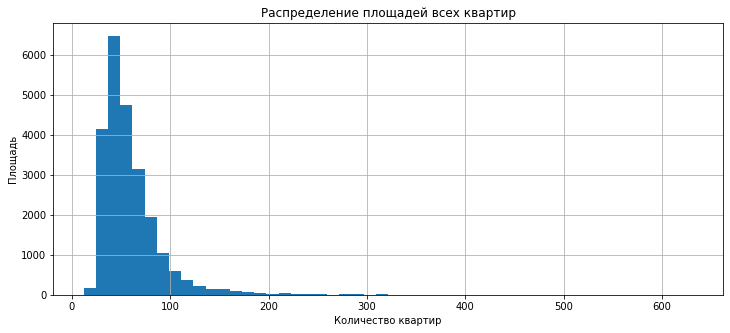

In [46]:
# создаем график 
df.hist('total_area', bins=50, figsize=(12,5))
plt.title('Распределение площадей всех квартир')
plt.xlabel('Количество квартир')
plt.ylabel('Площадь')
plt.show()

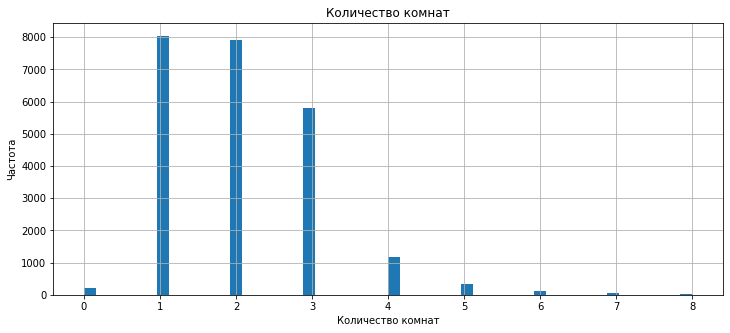

In [47]:
# создаем график
df.hist('rooms', bins=50, figsize=(12,5))
plt.title('Количество комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Частота')
plt.show()

Для лучшей картины создадим корреляцию и посмотрим каких квартир больше.

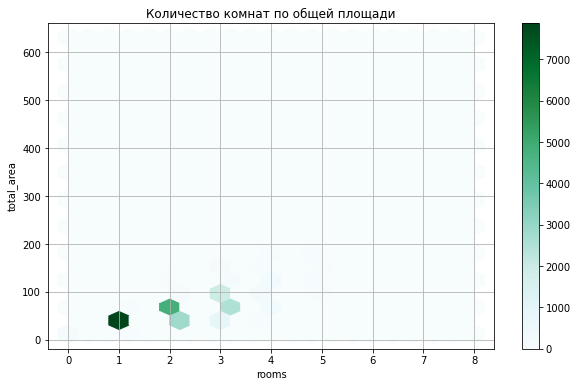

In [48]:
# создаем график
df.plot(x='rooms', y='total_area',
        kind='hexbin', gridsize=20, figsize=(10, 6),
        sharex=False, grid=True)
plt.title('Количество комнат по общей площади')
plt.show()

**Вывод**

Больше всего квартир на рынке - 1-комнатные квартиры с площадью от 40 до 60 кв.м.

Далее идут 2-комнатные квартиры с площадью от 40 до 80 кв.м.

3-комнатные в основном от 60 кв.м и выше.

#### Жилая площадь и площадь кухни

In [49]:
df['living_area'].describe()

count    21734.000000
mean        34.304354
std         21.348029
min          2.000000
25%         18.600000
50%         30.000000
75%         42.200000
max        347.500000
Name: living_area, dtype: float64

In [50]:
df['kitchen_area'].describe()

count    21363.000000
mean        10.548886
std          5.814733
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

Есть квартиры с жилой площадью в 2 кв.м. Это явно ошибка. Можем смело удалять такие квартиры.

Есть и кухни минималистические (не дизайн). Но тут случай другой. Можно предположить, что это размер кухни в студиях, где и так площадь не большая.

In [51]:
# посчитаем кол-во кв с менее чем 5кв жил.площади
len(df.loc[df['living_area'] < 5])

4

Есть квартиры, где жилая площадь меньше 5кв.м. Удаляем!

In [52]:
df.drop(df.loc[df['living_area'] < 5].index, inplace=True)
df = df.reset_index(drop=True) 

Посмотрим на графике.

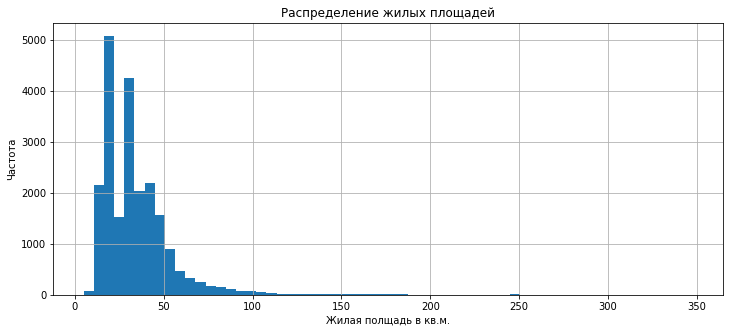

In [53]:
# создаем график
df.hist('living_area', bins=60, figsize=(12,5))
plt.title('Распределение жилых площадей')
plt.xlabel('Жилая полщадь в кв.м.')
plt.ylabel('Частота')
plt.show()

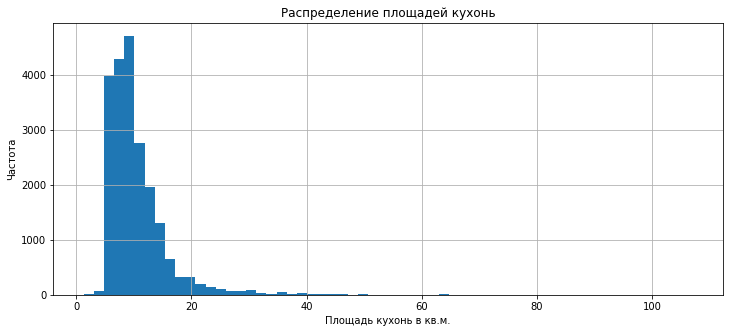

In [54]:
# создаем график
df.hist('kitchen_area', bins=60, figsize=(12,5))
plt.title('Распределение площадей кухонь')
plt.xlabel('Площадь кухонь в кв.м.')
plt.ylabel('Частота')
plt.show()

**Вывод**

После сортировки видим, что большинство квартир имеют жилую площадь от 20 до 40 кв.м. А кухни обычно составляют от 7 до 15 кв.м.

#### Цена объекта

In [55]:
df['price_1000'].describe()

count     23627.000000
mean       6501.795117
std       10521.882237
min          12.190000
25%        3400.000000
50%        4640.000000
75%        6766.696000
max      763000.000000
Name: price_1000, dtype: float64

Судя по данным, кто-то продает квариру за 12т рублей и кто-то за 763млн рублей. Предположим что это опять таки ошибки при вводе данных. Проверим какую долю составляют эти данные.

In [56]:
# найдем квартиры меньше 1млн. рублей 
len(df.loc[df['price_1000'] < 1000])

225

In [57]:
# найдем квартиры дороже 500млн. рублей
len(df.loc[df['price_1000'] > 500000])

1

Для повышения точности данных мы нашли квартиры, стоимость которых составляет менее 1 миллиона рублей. Однако, мы сомневаемся, что можно найти квартиру за 1 миллион в Санкт-Петербурге. Поэтому мы можем удалить эти сомнительные данные.

А для элитных квартир мы оставили ограничение в 500 миллионов рублей.

In [58]:
# удалияем аномально дешевые и дорогие крвартиры 
df.drop(df.loc[df['price_1000'] < 1000].index, inplace=True)
df = df.reset_index(drop=True)

df.drop(df.loc[df['price_1000'] > 500000].index, inplace=True)
df = df.reset_index(drop=True)

Создадим корреляцию, чтоб увидеть распределение цен на разные квартиры (1, 2, 3 и больше комнат). 

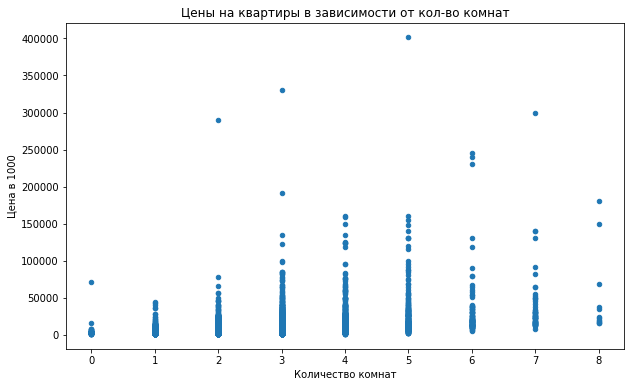

In [59]:
# создаем график
df.plot(x='rooms', y='price_1000', kind='scatter', figsize=(10, 6))
plt.title('Цены на квартиры в зависимости от кол-во комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Цена в 1000')
plt.show()

**Вывод**

Студии не всегда являются дорогими, но есть и такие, которые стоят почти 7 миллионов рублей. Квартиры с одной комнатой также могут продаваться до 5 миллионов рублей. Квартиры с двумя комнатами могут стоить до 8 миллионов рублей. И так далее, цены на квартиры увеличиваются по мере увеличения количества комнат.

#### Высота потолков

In [60]:
df['ceiling_height'].describe()

count    23401.000000
mean         2.697106
std          0.214288
min          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.900000
Name: ceiling_height, dtype: float64

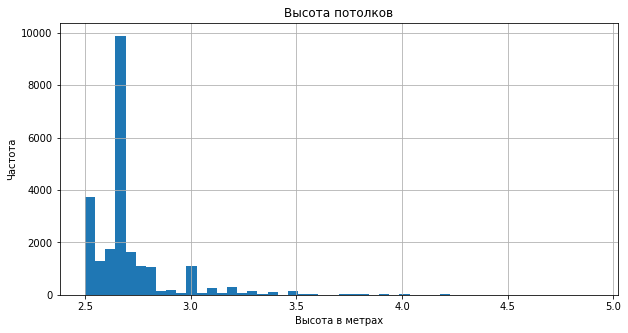

In [61]:
# создаем график
df.hist('ceiling_height', bins=50, figsize=(10,5)) 
plt.title('Высота потолков')
plt.xlabel('Высота в метрах')
plt.ylabel('Частота')
plt.show()

**Вывод**

На стадии предобработки мы избавились от аномальных значений в этом столбце.

В целом, все выглядит нормально. Есть квартиры с высотой потолка 2.5 метра, и есть которые выбиваются выше 3 метров. Однако на рынке в основном представлены квартиры с потолком высотой 2.7 метра.

#### Тип этажей и общее кол-во этажей в доме

Создадем график.

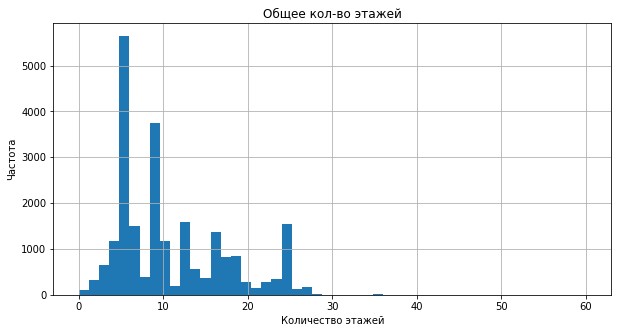

In [62]:
# создаем график
df['floors_total'].hist(bins=50, figsize=(10,5)) 
plt.title('Общее кол-во этажей')
plt.xlabel('Количество этажей')
plt.ylabel('Частота')
plt.show()

По всплескам в данных видно, что у нас много домов типовой застройки.

In [63]:
df['floor_type'].value_counts()

другой       17321
последний     3265
первый        2815
Name: floor_type, dtype: int64

In [64]:
# вычислим долю квартир, которые имеют значение 'другой'
len(df.loc[df['floor_type'] == 'другой']) / len(df) * 100

74.01820435024145

In [65]:
# вычислим долю квартир, которые имеют значение 'первый'
len(df.loc[df['floor_type'] == 'первый']) / len(df) * 100

12.029400452972096

In [66]:
# вычислим долю квартир, которые имеют значение 'последний'
len(df.loc[df['floor_type'] == 'последний']) / len(df) * 100

13.952395196786464

**Вывод** 

Подавляющее большинство домов, где продают квартиры, имеют 5 и 9 этажей.
* 12% квартир находятся на 1 этаже;
* 14% - на последнем этаже;
* И 74% - находятся на этажах с 2 по предпоследний.

#### Растояние до центра и до ближайшего парка

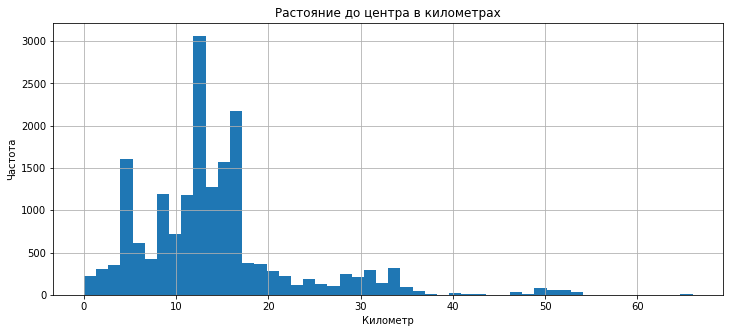

In [67]:
# создаем график
df['km_to_city_center'].hist(bins=50, figsize=(12,5))
plt.title('Растояние до центра в километрах')
plt.xlabel('Километр')
plt.ylabel('Частота')
plt.show()

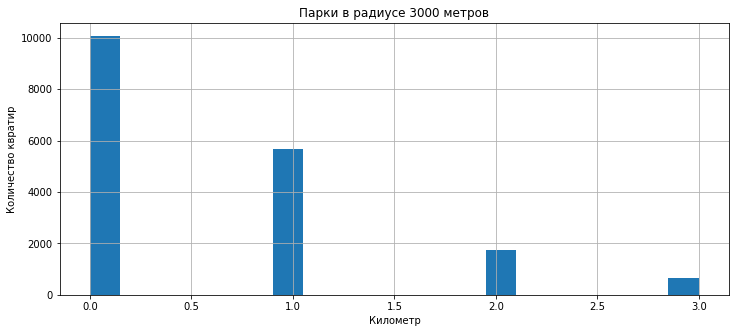

In [68]:
# создаем график
df['parks_around_3000'].hist(bins=20, figsize=(12,5))
plt.title('Парки в радиусе 3000 метров')
plt.xlabel('Километр')
plt.ylabel('Количество квратир')
plt.show()

**Вывод**

* Большинство квартир на рынке находятся на расстоянии 12 км от центра, также большая выборка квартир на расстоянии 5 км от центра и 17 км. Выделяются и объекты почти в пригороде.
* В качестве ближайших парков выбрали столбец с парками на расстоянии 3 км. У более чем 10 тысяч объектов парки практически под домом, далее идут квартиры, где на расстоянии 1 км есть парки и т.д.

### Изучим, как быстро продавались квартиры .

Построем гистограмму.

In [69]:
# выводим статистическую информацию о столбце 'days_exposition', включая указанные перцентили
df['days_exposition'].describe(percentiles=[0.20, 0.35, 0.50, 0.75, 0.95]).round().astype(int)

count    20272
mean       181
std        220
min          1
20%         34
35%         60
50%         95
75%        231
95%        647
max       1580
Name: days_exposition, dtype: int64

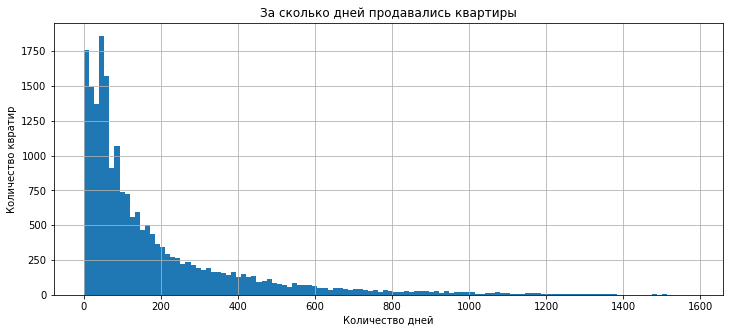

In [70]:
# создаем график
df['days_exposition'].hist(bins=120, figsize=(12, 5))
plt.title('За сколько дней продавались квартиры')
plt.xlabel('Количество дней')
plt.ylabel('Количество квратир')
plt.show()

Придадим гистограмме параметры до 3 лет или 1000 дней для более четкой картины.

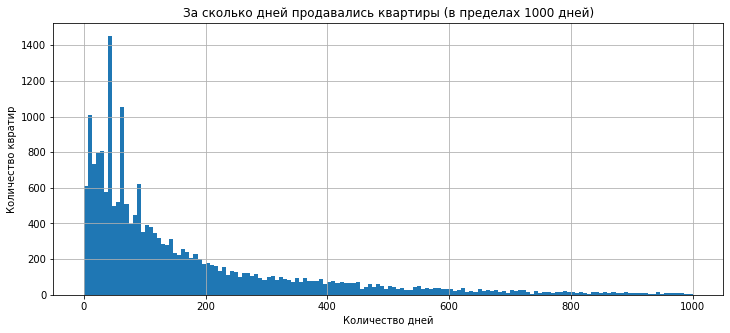

In [71]:
# создаем график
df['days_exposition'].hist(bins=150, figsize=(12, 5), range=(0, 1000))
plt.title('За сколько дней продавались квартиры (в пределах 1000 дней)')
plt.xlabel('Количество дней')
plt.ylabel('Количество квратир')
plt.show()

**Вывод**

В среднем квартиры продаются в течение 6 месяцев, но медиана составляет 3 месяца (точнее 95 дней).

Это связано с тем, что есть объекты, которые продаются за один день, а также объекты, которые уже находятся на продаже 1580 дней.

Возможно, квартиры, которые продаются очень быстро (за месяц или 2), имеют более ценники ниже рынка. Владельцы таких квартир заинтересованы не только в выгодной продаже, но и в быстрой сделке. С другой стороны, объекты, которые находятся на продаже уже больше года, могут просто ждать подходящего момента и выгодного предложения.

### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

Изучим, зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

Используем сводные таблицы. 

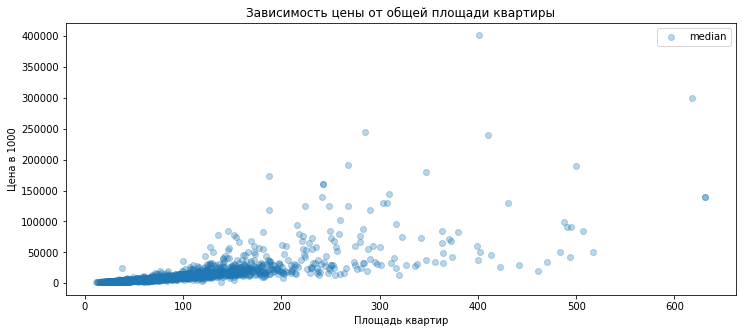

0.6950731853657733

In [72]:
# зависимость цены от общей площади
pivot_table_total_area = df.pivot_table(index='total_area', values='price_1000',\
                                        aggfunc=['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']

# создаем график 
pivot_table_total_area.plot(y='median', style='o', figsize=(12, 5), alpha=0.3)
pivot_table_total_area.sort_values('median', ascending=False)
plt.title('Зависимость цены от общей площади квартиры')
plt.xlabel('Площадь квартир')
plt.ylabel('Цена в 1000')
plt.show()

# вычислим корреляцию между столбцами 'total_area' и 'price_1000' 
display(df['total_area'].corr(df['price_1000']))

Чем больше площадь, тем больше цена.

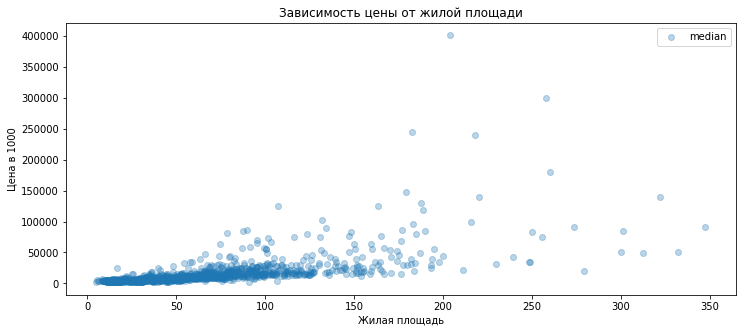

0.6040791517061246

In [73]:
# зависимость цены от жилой площади
pivot_table_living_area = df.pivot_table(index='living_area', values='price_1000',\
                                         aggfunc=['mean', 'count', 'median'])
pivot_table_living_area.columns = ['mean', 'count', 'median']

# создаем график 
pivot_table_living_area.plot(y='median', style='o', figsize=(12, 5), alpha=0.3)
pivot_table_living_area.sort_values('median', ascending=False)
plt.title('Зависимость цены от жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Цена в 1000')
plt.show()

# вычислим корреляцию между столбцами 'living_area' и 'price_1000' 
df['living_area'].corr(df['price_1000'])

Похожая закономерность. Чем больше площадь (не важно какая), тем дороже цена.

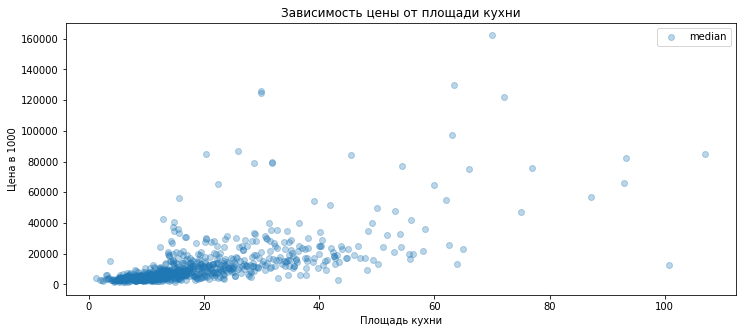

0.5069167941809692

In [74]:
# зависимость цены от площади кухни
pivot_table_kitchen_area = df.pivot_table(index='kitchen_area', values='price_1000',\
                                          aggfunc=['mean', 'count', 'median'])
pivot_table_kitchen_area.columns = ['mean', 'count', 'median']

# создаем график 
pivot_table_kitchen_area.plot(y='median', style='o', figsize=(12, 5), alpha=0.3)
pivot_table_kitchen_area.sort_values('median', ascending=False)
plt.title('Зависимость цены от площади кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Цена в 1000')
plt.show()

# вычислим корреляцию между столбцами 'kitchen_are' и 'price_1000' 
df['kitchen_area'].corr(df['price_1000'])

История повторяется. 

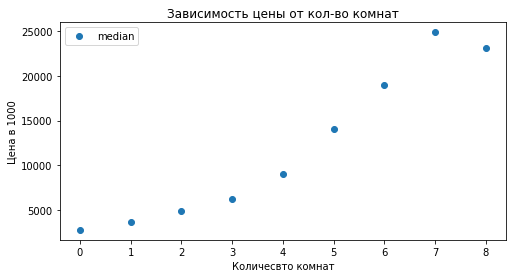

0.3869212484922128

In [75]:
# зависимость цены от кол_во комнат
pivot_table_rooms = df.pivot_table(index='rooms', values='price_1000',\
                                   aggfunc=['mean', 'count', 'median'])
pivot_table_rooms.columns = ['mean', 'count', 'median']

# создаем график
pivot_table_rooms.plot(y='median', style='o', figsize=(8, 4))
pivot_table_rooms.sort_values('median', ascending=False)
plt.title('Зависимость цены от кол-во комнат')
plt.xlabel('Количесвто комнат')
plt.ylabel('Цена в 1000')
plt.show()

# вычислим корреляцию между столбцами 'kitchen_are' и 'price_1000' 
df['rooms'].corr(df['price_1000'])

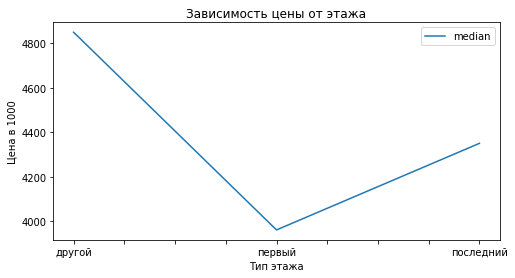

,mean,count,median
floor_type,,,
другой,6688.581056,17321,4850.000
первый,4872.899951,2815,3960.396
последний,7078.696690,3265,4350.000


In [76]:
# зависимость цены от этажа
pivot_table_floor_type = df.pivot_table(index='floor_type', values='price_1000',\
                                        aggfunc=['mean', 'count', 'median'])
pivot_table_floor_type.columns = ['mean', 'count', 'median']

# создаем график
pivot_table_floor_type.plot(y='median', figsize=(8, 4))
plt.title('Зависимость цены от этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Цена в 1000')
plt.show()

# выводим таблицу
pivot_table_floor_type

В данном случае первый и последние этажи намного дешевле, чем другие. Фактор безопасности.

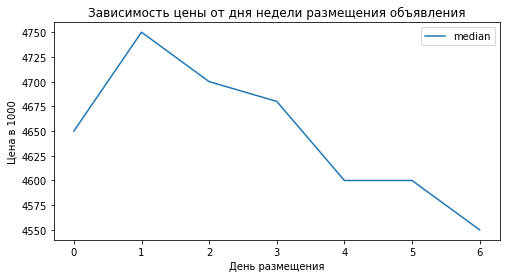

,mean,count,median
weekday_exposition,,,
1,6401.988251,4136,4750.0
2,6547.245500,3921,4700.0
3,6734.116528,4246,4680.0
0,6543.361118,3574,4650.0
4,6415.435969,3956,4600.0
5,6666.809727,1895,4600.0
6,6299.818867,1673,4550.0


In [77]:
# зависимость цены от дня(недели) размещения объявления
pivot_table_weekday_exposition = df.pivot_table(index='weekday_exposition', values='price_1000',\
                                                  aggfunc=['mean', 'count', 'median'])
pivot_table_weekday_exposition.columns = ['mean', 'count', 'median']

# создаем график
pivot_table_weekday_exposition.plot(y='median', figsize=(8, 4))
plt.title('Зависимость цены от дня недели размещения объявления')
plt.xlabel('День размещения')
plt.ylabel('Цена в 1000')
plt.show()

# выводим таблицу
pivot_table_weekday_exposition.sort_values('median', ascending=False)

Чем ближе объявления выставлены к вторнику, тем в среднем выше стоимость, но разница незначительна. Стоимость самая низкая по выходным.

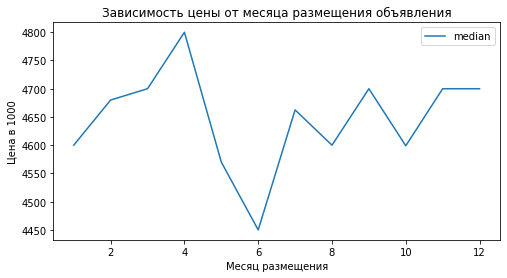

,mean,count,median
month_exposition,,,
4,6776.899719,2352,4800.0
3,6368.143162,2554,4700.0
9,6504.092393,1958,4700.0
11,6482.552637,2347,4700.0
12,6793.317682,1622,4700.0
2,6488.451454,2603,4680.0
7,6652.172957,1670,4662.5
1,6711.983472,1471,4600.0
8,6395.266805,1729,4600.0


In [78]:
# зависимость цены от месяца размещения объявления
pivot_table_month_exposition = df.pivot_table(index='month_exposition', values='price_1000',\
                                                  aggfunc=['mean', 'count', 'median'])
pivot_table_month_exposition.columns = ['mean', 'count', 'median']

# создаем график 
pivot_table_month_exposition.plot(y='median', figsize=(8, 4))
plt.title('Зависимость цены от месяца размещения объявления')
plt.xlabel('Месяц размещения')
plt.ylabel('Цена в 1000')
plt.show()

# выводим таблицу
pivot_table_month_exposition.sort_values('median', ascending=False)

Самые высокие цены в апреле, марте и в конце годе. Самые низкие мае, июне. 

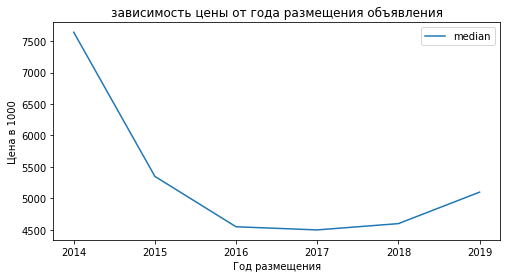

,mean,count,median
year_exposition,,,
2014,12046.600176,136,7640.0
2015,8567.334146,1165,5350.0
2019,6785.728295,2845,5100.0
2018,6011.413522,8398,4600.0
2016,6859.186130,2735,4550.0
2017,6465.607830,8122,4500.0


In [79]:
# зависимость цены от года размещения объявления
pivot_table_year_exposition = df.pivot_table(index='year_exposition', values='price_1000',\
                                                  aggfunc=['mean', 'count', 'median'])
pivot_table_year_exposition.columns = ['mean', 'count', 'median']

# создаем график
pivot_table_year_exposition.plot(y='median', figsize=(8, 4))
plt.title('зависимость цены от года размещения объявления')
plt.xlabel('Год размещения')
plt.ylabel('Цена в 1000')
plt.show()

# выводим таюлицу
pivot_table_year_exposition.sort_values('median', ascending=False)

Видим, что цены с 2014 до 2016 года падали, но потом начали опять расти, но уже медленее. 

**Вывод**

Первая часть анализа на данном этапе показывает логические значения. Стоимость квартиры напрямую зависит от площади, не только общей, но и от площади жилой площади, а также от количества комнат.

Ситуация с этажами немного иная. Вероятно, люди, учитывая фактор безопасности, редко покупают квартиры на первом этаже и на последнем (холодно, возможны затопления от сильных дождей и снега и т.д.), поэтому цены на такие квартиры ниже, чем на другие.

Цены также варьируются в зависимости от дня недели и месяца, когда были опубликованы объявления. В начале недели цены выше, в конце недели - ниже. Весной цены выше, к концу года и с наступлением зимы - ниже.

В случае с годами, можно предположить, что цены на недвижимость начали падать с 2014 года из-за геополитической ситуации и оттока капитала из РФ.

### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [80]:
df['locality_name'].value_counts(False).head(10)

Санкт-Петербург      15697
поселок Мурино         555
поселок Шушары         440
Всеволожск             397
Пушкин                 369
Колпино                338
поселок Парголово      327
Гатчина                306
деревня Кудрово        299
Выборг                 233
Name: locality_name, dtype: int64

Нашли топ 10 населенных пунктов по объявлениям. Теперь найдем среднюю цену квадратного метра в этих наседенных пунктах.

In [81]:
# найдем среднюю цену кв.метра в топ-10 населеных пунктах 
area = (df.pivot_table(index='locality_name', 
                        values=['price_sqm', 'price_1000'], 
                        aggfunc={'price_sqm':['count', 'mean']})
        .sort_values(by=[('price_sqm','count')], ascending=False).head(10)
)
area

price_sqm            
                      count        mean
locality_name                          
Санкт-Петербург       15697  114.708677
поселок Мурино          555   85.653694
поселок Шушары          440   78.677614
Всеволожск              397   68.719270
Пушкин                  369  103.125854
Колпино                 338   75.424467
поселок Парголово       327   90.176177
Гатчина                 306   68.935359
деревня Кудрово         299   92.473712
Выборг                  233   58.685665

**Вывод**

Самое большое количество объявлений приходится на Питер, более 50% от общего числа. И самая высокая цена за квадратный метр также в Питере, в среднем 115 000 рублей.

Затем следует Мурино с ценой в среднем 85 000 рублей за квадратный метр, затем Шушары с ценой 79 000 рублей и т.д.

### Вычислим среднюю цену каждого километра до центра Санкт-Петербургa

In [82]:
df['km_to_city_center'].describe()

count    18115.000000
mean        14.201214
std          8.615175
min          0.000000
25%          9.000000
50%         13.000000
75%         16.000000
max         66.000000
Name: km_to_city_center, dtype: float64

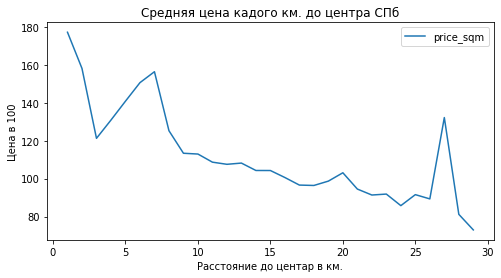

,price_sqm
km_to_city_center,
1.0,177.042042
2.0,157.981715
3.0,121.179109
4.0,130.801985
5.0,140.740601


In [83]:
# сделаем срез 
pivot_table_km = df.query('locality_name == "Санкт-Петербург" and km_to_city_center')\
                    .pivot_table(index='km_to_city_center', values='price_sqm', aggfunc='mean')

# создаем график 
pivot_table_km.plot(figsize=(8, 4))
plt.title('Средняя цена кадого км. до центра СПб')
plt.xlabel('Расстояние до центар в км.')
plt.ylabel('Цена в 100')
plt.show()

# выводим таблицу
pivot_table_km.head()

**Вывод**

Можем смело удтверждать что центр это в радиусе 5км. Дальше цена уже падает.

## Общий вывод

Мы обработали предоставленные данные с помощью сервиса Яндекс.Недвижимость, архив объявлений о продаже квартир в Санкт-Петербурге и соседних населенных пунктах. Нашей задачей было выявить, какие параметры оказывают влияние на стоимость квартир.

Выяснили следующее:
* Установили, что в среднем квартиры продаются за 6 месяцев или 181 день;
* Выяснили, что цена объектов напрямую зависит от площади квартир и количества комнат, что логично. Также выяснили, что квартиры на первом и последнем этажах значительно дешевле, чем на других. Цены на квартиры еще зависят от дня недели и месяца, когда были выставлены на продажу. В начале недели цены выше, к концу недели - ниже. Весной можно продать дороже, а к концу года с началом холодного сезона - нельзя значительно заработать от продажи;
* Больше половины объявлений приходится на объекты в самом Санкт-Петербурге, что также логично;
* Цена на квартиры зависит от их расположения. Чем ближе к центру, тем выше цена. Центр у нас определен радиусом 5 км. Затем цена падает с увеличением расстояния от центра. Однако стоит отметить, что цены на объекты в пригороде практически такие же, как и в радиусе 5 км от центра. Можно предположить, что это связано с чистым и свежим воздухом, наличием парков и прудов поблизости.